In [18]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import seaborn as sb
import pandas as pd
import random as rd

from copy import deepcopy as copy
from collections import defaultdict
from MDAnalysis.analysis import pca as mda_pca
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

import nglview as nv

import sys
import warnings
warnings.filterwarnings('ignore')

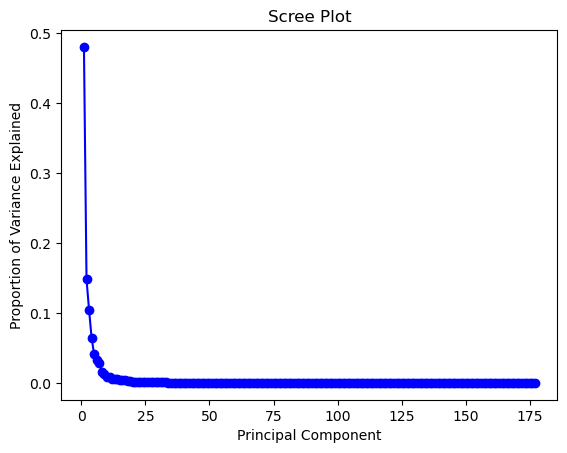

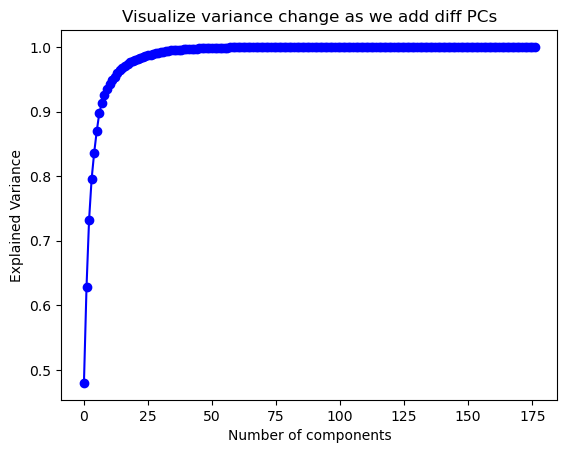

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [23]:
data = np.loadtxt('high_variance_distances.dat')
data_pts = data.copy()
data.shape

pca = PCA()
pca.fit(data)
new_data = pca.transform(data)

PC_values = np.arange(pca.n_components_) + 1

plt.title('Scree Plot')
plt.plot(PC_values, pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

plt.title('Visualize variance change as we add diff PCs')
plt.ylabel('Explained Variance')
plt.xlabel('Number of components')
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.show()

obj_list = []
for k in range(2,20):
    print(k)
    kmeans = KMeans(n_clusters=k).fit(data)
    obj_min = kmeans.inertia_
    obj_list.append(obj_min)

plt.plot(np.arange(2,20), obj_list, 'c*')

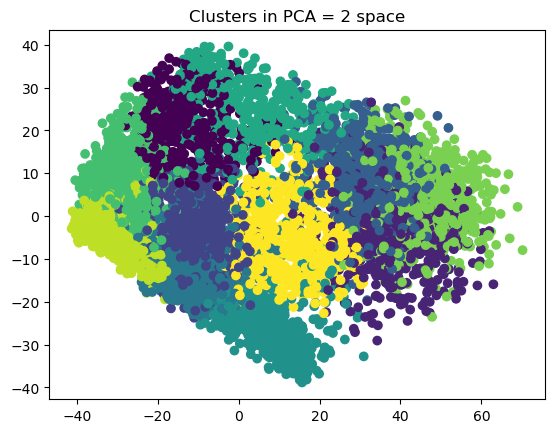

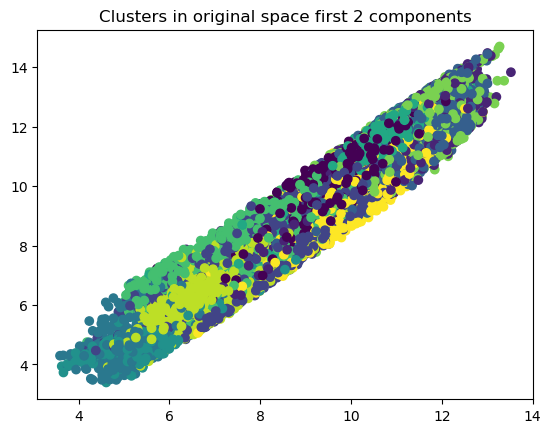

In [44]:
x = data
nc_pca = 2
pca_2 = PCA(n_components=nc_pca)
new_x = pca_2.fit_transform(x)
skm = KMeans(n_clusters=11).fit(x)
skz = skm.labels_
plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:,0], new_x[:,1], c=skz)
plt.show()
plt.title("Clusters in original space first 2 components")
plt.scatter(x[:,0], x[:,1], c=skz)
plt.show()

In [38]:
class kmeans:

    def __init__(self, N_c):
        
        self.N_centroids = N_c
        
    def initialization_of_centroids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_centroids, replace=False)
        return self.data[ sel ]
    
    def initialization_of_centroids_plusplus(self):    
        i=rd.randint(0,self.N_points-1)
        centroids=np.array([self.data[i]])
        for k in range(1, self.N_centroids):
            D=np.array([]) 
            D=np.append(D,np.min(cdist(self.data, centroids,'sqeuclidean'), axis=1))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            centroids=np.append(centroids,[self.data[i]],axis=0)
        return centroids
         
    
    def fit(self, data, init="random", N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0]
        
        if init=="k-means++":
            self.centroid_positions =  self.initialization_of_centroids_plusplus()
        else:    
            self.centroid_positions =  self.initialization_of_centroids_random()
            
        for cnt in range(N_max_iterations):
            dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
            dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
            self.labels = np.argmin(dist2_mat, axis = 1)
            loss = dist2_min.sum() 
            skip=False
            for i in range(self.N_centroids):
                if len(self.data[self.labels  == i ]) == 0:
                    skip = True
            if skip == True :
                self.centroid_positions = self.initialization_of_centroids_random()
                continue
            new_centers = np.array([self.data[self.labels  == i].mean(axis=0) for i in range(self.N_centroids)])
            if np.all(self.centroid_positions == new_centers):
                break
            self.centroid_positions = new_centers
        if cnt == N_max_iterations-1: 
            print("Max iterations reached")
        return loss, cnt 

       
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')
        
    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out
     

3633884.459964569 82


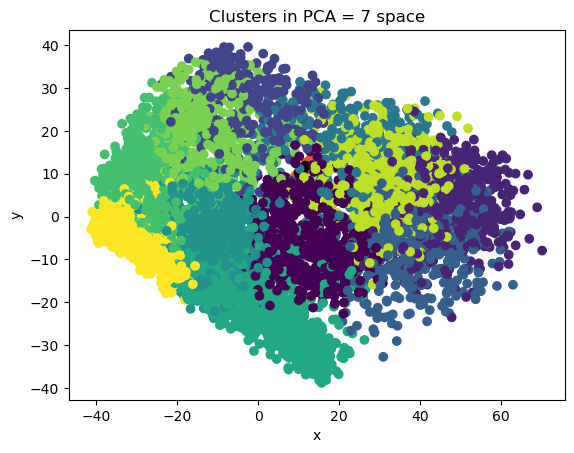

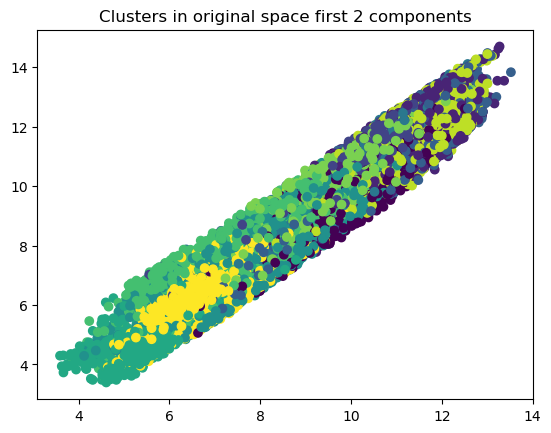

In [43]:
test_km = kmeans(11)
loss,iteration=test_km.fit(data)
test_km.plot()
print(loss,iteration)

test_labels = test_km.get_assignation()

plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:,0], new_x[:,1], c=test_labels[:,2])
plt.show()

plt.title("Clusters in original space first 2 components")
plt.scatter(test_labels[:,0], test_labels[:,1], c=test_labels[:,2])
plt.show()

0 2815526.0110649257 40
1 2806186.4685735023 60
2 2794190.460850491 60
3 2821757.5370808393 41
4 2822647.8349571694 73
5 2797229.4084392474 36
6 2769508.661344072 104
7 2840040.1606249586 64
8 2802148.702091821 43
9 2798367.817146602 25
10 2815600.7437191973 63
11 2833817.561715249 62
12 2795091.3014463764 35
13 2782949.580339877 76
14 2801730.0727527156 43
15 2796697.789960676 64
16 2817918.1807461884 49
17 2809853.912662967 61
18 2846690.596479702 38
19 2794645.7846013755 60
20 2867146.0073125763 51
21 2813485.4405986867 41
22 2793650.26200502 63
23 2790036.050811127 30
24 2830482.7858157917 30
25 2808037.176655542 39
26 2787781.132618023 41
27 2839841.675391673 115
28 2787788.2100213757 69
29 2809864.891589724 63
mean =  2809690.4073139173
i_min =  6
min =  2769508.661344072
avg convergence =  54.63333333333333


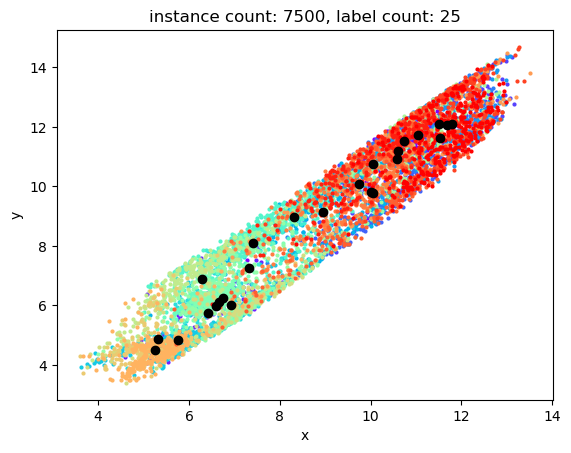

In [14]:
N_simulations=30
tmp_km = kmeans(25)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_km.fit(data=data_pts, init="random") 
    if loss < min_loss:
        min_loss=loss
        i_min=i
        min_km = tmp_km
    #print(i, loss, iteration)    
    losses[i]=loss
    iterations[i]=iteration
    
min_km.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convergence = ",iterations.mean())
plt.show()

0 2806302.507069201 21
1 2774966.483100944 41
2 2833909.6621909244 36
3 2787460.4196555414 44
4 2798612.1961833443 49
5 2809281.943762803 25
6 2785377.251493179 26
7 2788526.7765655452 69
8 2803379.650354773 45
9 2804588.0916438974 36
10 2801349.043523635 50
11 2779690.176016951 56
12 2801685.4040047475 51
13 2812426.742706688 64
14 2797616.126134808 35
15 2823089.8686499596 39
16 2801361.76624033 59
17 2790903.652054102 45
18 2811962.4791803407 52
19 2781910.175684029 47
20 2788065.441556216 56
21 2784314.9810381006 69
22 2806173.2453807076 62
23 2785381.6974154366 33
24 2798512.835666908 26
25 2819937.097864753 43
26 2773812.6446169796 43
27 2804427.328622875 32
28 2790373.154190321 75
29 2799557.2820081543 36
mean =  2798165.2041525394
i_min =  26
min =  2773812.6446169796
avg convergence =  45.5


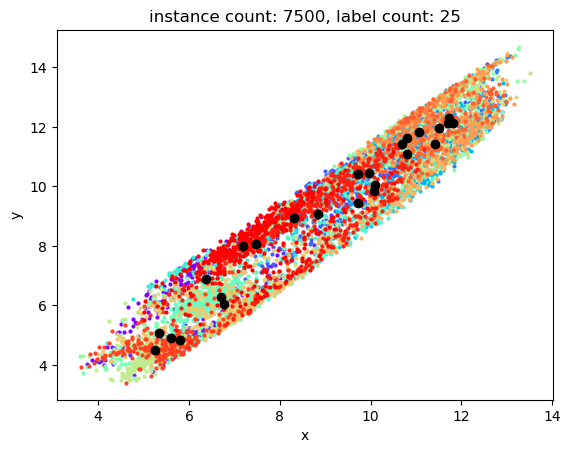

In [15]:
N_simulations=30
tmp_kmpp = kmeans(25)
min_loss= np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_kmpp.fit(data=data_pts, init="k-means++") 
    if loss<min_loss:
        min_loss=loss
        i_min=i
        min_kmpp = tmp_kmpp
    #print(i,loss,iteration)        
    losses[i]=loss
    iterations[i]=iteration
    
min_kmpp.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convergence = ",iterations.mean())
plt.show()

2 7238885.206879026
3 6094775.491743801
4 5398180.154270052
5 4777464.9832361415
6 4454980.44908721
7 4222996.097416623
8 4023218.7923742607
9 3840987.1636604783
10 3708878.5661669774
11 3605106.6173130637
12 3473743.684364764
13 3381415.0243495107
14 3303133.2239269125
15 3224009.1080653677
16 3168106.5950195966
17 3109526.8205240956
18 3059484.5226190044
19 3004383.075251416
20 2966620.776248187
21 2918441.4142950703
22 2884096.536702563
23 2850453.787235629
24 2823165.8644030583
25 2781806.490963278
26 2762350.8210174274
27 2719427.2424362125
28 2698524.321599718
29 2673870.394151977
30 2654467.8435111074


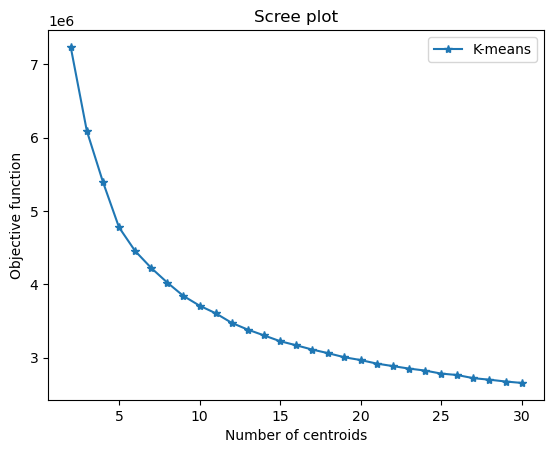

In [13]:
N_simulations=10

res_k=list()

for n_c in range(2,31):
    tmp_km = kmeans(n_c)
    min_loss = sys.maxsize
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss,iteration=tmp_km.fit(data=data_pts) 
        if loss<min_loss:
            min_loss=loss
            i_min=i
            min_km = tmp_km 
        losses[i]=loss
        iterations[i]=iteration
    print(n_c,losses[i_min])    
    res_k.append([n_c,losses[i_min]])

res_k=np.array(res_k)
plt.plot(res_k[:,0], res_k[:,1], '*-', label="K-means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

In [46]:
skz

array([1, 1, 1, ..., 9, 9, 9], dtype=int32)